Anggota:
- Guido Tamara (1301193303)
- Muhammad Farhan Fhalosa (1301194411)
- Firyal Yamiza Akbar (1301194154)
- Kurniawan Malik Ibrahim (1301194116)

# **Informasi Data**

#### Sumber Data

Data set yang digunakan yaitu Dataset Movielens dataset ml-latest-small.zip dari tautan berikut https://grouplens.org/datasets/movielens/

Ini berisi 100.836 ratings di 9742 movies.


**movie.csv**
- movieId – unique nomor movie
- title – nama movie 
- movieId – unique nomor movie 

**rating.csv**
- userid – unique nomor user 
- movieId – unique nomor movie 
- rating – peringkat yang diberikan ke film oleh pengguna
- timestamp – tanggal rilis film

# **Import Library**

In [ ]:
%pip install recmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.2-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


In [ ]:
%pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
recmetrics 0.1.5 requires matplotlib<4.0.0,>=3.3.2, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
# utilities
import numpy as np
import pandas as pd
# import tensorflow as tf
import random

# surprise
from surprise import Reader, SVD, Dataset, accuracy
from surprise.model_selection import GridSearchCV, train_test_split, cross_validate, KFold

# sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

# recmetrics
import recmetrics

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
from plotly.offline import iplot

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Data Exploaration**

**Load Data**

In [ ]:
# Import Dataset
df_movies = pd.read_csv("https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-RecSys/master/Dataset/movies.csv",)
df_ratings = pd.read_csv("https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-RecSys/master/Dataset/ratings.csv")

**Movies Dataset**

In [ ]:
# Periksa 5 baris teratas
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Check info df_movies
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
# checking missing values
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
# Mengecek unique movies
df_movies["title"].nunique()

9737

In [ ]:
# Mellihat berapa banyak film ditampilkan
df_movies["title"].value_counts().head()

Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
Name: title, dtype: int64

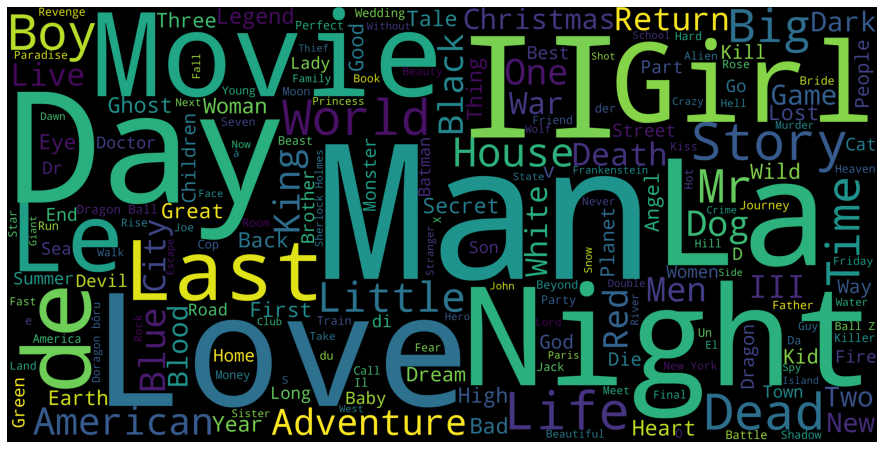

In [ ]:
# kata-kata tertentu yang lebih sering ditampilkan dalam Judul Film
# Membuat wordcloud dari movie titles
df_movies['title'] = df_movies['title'].fillna("").astype('str')
title_corpus = ' '.join(df_movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

**Ratings Dataset**

In [ ]:
# Periksa 5 baris teratas dan drop kolom 'timestamp'
df_ratings = df_ratings.drop('timestamp', 1)
df_ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
# Check info file df_ratings
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [ ]:
# checking missing values
df_ratings.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [ ]:
# Ringkasan statistics dari rating
df_ratings['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

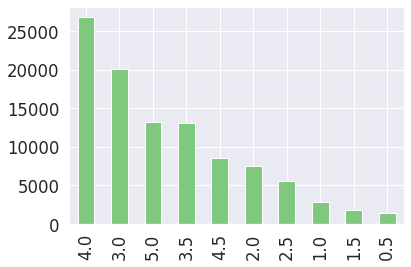

In [ ]:
# menghitung rating atau berapa kali rating diberikan
df_ratings['rating'].value_counts().plot(kind='bar',colormap='Accent')

In [ ]:
# Melakukan percobaan melihat genre mana yang paling populer.
# Buat sensus kata kunci genre
genre_labels = set()
for s in df_movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Fungsi yang menghitung berapa kali setiap kata kunci genre muncul
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1

    # konversi kamus dalam daftar untuk mengurutkan kata kunci berdasarkan frekuensi
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Memanggil fungsi ini memberikan akses ke daftar kata kunci genre yang diurutkan berdasarkan frekuensi yang menurun
keyword_occurences, dum = count_word(df_movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 4361],
 ['Comedy', 3756],
 ['Thriller', 1894],
 ['Action', 1828],
 ['Romance', 1596]]

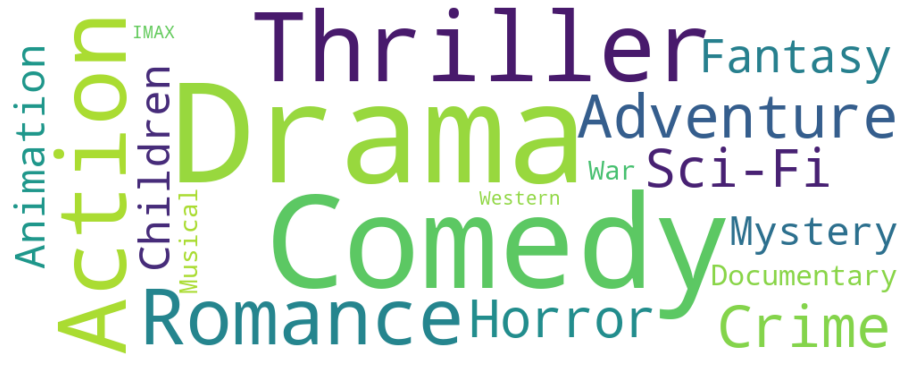

In [ ]:
# Menentukan kamus yang digunakan untuk menghasilkan genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Membuat wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Menggabungkan movies dengan avg ratings

In [ ]:
movies = df_movies.copy()
ratings = df_ratings.copy()

In [ ]:
avg_ratings = ratings[['movieId' , 'rating']].groupby('movieId').mean().round(2)
movies = movies.merge(avg_ratings, how='inner', on='movieId')
movies.head(5)

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


Menemukan 10 film dengan banyak yang me-rating 

In [ ]:
# Jumlah yang ratings
count_of_ratings = ratings[['movieId' , 'userId']].groupby('movieId').count()
count_of_ratings.rename(columns={'userId' : 'Count of Ratings'}, inplace=True)

# Menggabungkan hitungan ratings dengan nama film
# top 10 most rated movies
movie_rating_counts = movies[['movieId','title']].merge(count_of_ratings, on='movieId')

movie_rating_counts.sort_values('Count of Ratings' , ascending=False)[:10] [['title' , 'Count of Ratings']]

,title,Count of Ratings
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278
224,Star Wars: Episode IV - A New Hope (1977),251
418,Jurassic Park (1993),238
97,Braveheart (1995),237
507,Terminator 2: Judgment Day (1991),224
461,Schindler's List (1993),220


10 film dengan rating tertinggi

In [ ]:
# Penggabungan Dataset movies dengan movie_rating_counts
movies = movies.merge(movie_rating_counts[['movieId' , 'Count of Ratings']])

# 10 besar film dengan rating tertinggi -- min. Tersedia 200 Count of Ratings.
movies[movies['Count of Ratings'] > 200].sort_values('rating', ascending=False) [:10]

,movieId,title,genres,rating,Count of Ratings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.27,218
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.24,204
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.22,211
461,527,Schindler's List (1993),Drama|War,4.22,220
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279


# **Pemodelan (Hybrid Recommender Systems)**

## **Content Based Filtering (TF-IDF & Cosine Similarity)** 
Memberikan rekomendasi berdasarkan kemiripan atribut dari item atau barang yang disukai.

In [ ]:
# Menententukan Objek Vectorizer TF-IDF.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

# Ganti NaN dengan string kosong
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

# membangun matriks TF-IDF yang diperlukan dengan menyesuaikan dan mengubah data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])

# Menghitung matriks kesamaan kosinus
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix)
print(cosine_sim_movies)

[[1.         0.81357774 0.15276924 ... 0.         0.4210373  0.26758648]
 [0.81357774 1.         0.         ... 0.         0.         0.        ]
 [0.15276924 0.         1.         ... 0.         0.         0.57091541]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.4210373  0.         0.         ... 0.         1.         0.        ]
 [0.26758648 0.         0.57091541 ... 0.         0.         1.        ]]


10 film teratas untuk direkomendasikan berdasarkan genre judul film tertentu.

In [ ]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
    # Dapatkan indeks film yang sesuai dengan judulnya
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Dapatkan skor kesamaan berpasangan dari semua film dengan film tersebut
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Urutkan film berdasarkan skor kesamaan
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Dapatkan skor dari 10 film paling mirip
    sim_scores_movies = sim_scores_movies[0:10]
    
    # Dapatkan indeks film
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Mengembalikan 10 film paling mirip teratas
    return df_movies['title'].iloc[movie_indices]

In [ ]:
get_recommendations_based_on_genres("Sherlock Holmes: Dressed to Kill (1946)")

3130                             Death on the Nile (1978)
3619                      And Then There Were None (1945)
5298              Sherlock Holmes: Dressed to Kill (1946)
9124    The Adventures of Sherlock Holmes and Dr. Wats...
9140    The Adventures of Sherlock Holmes and Doctor W...
9141    Adventures Of Sherlock Holmes And Dr. Watson: ...
9142    The Adventures of Sherlock Holmes and Doctor W...
132                                       Clockers (1995)
1226                                        U Turn (1997)
1286       Midnight in the Garden of Good and Evil (1997)
Name: title, dtype: object

film teratas untuk direkomendasikan kepada pengguna berdasarkan film yang telah ditonton pengguna.

In [ ]:
def get_recommendation_content_model(userId): 
    # Membuat array kosong untuk ditampung
    recommended_movie_list = []
    movie_list = []

    # Menampilkan userID yang dipilih
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    
    # Perulangan untuk movies di masukan ke dalam movie_list
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values) 

    # Perulangan untuk enumerate movie_list di masukan ke dalam recommended_movie_list berdasarkan fungsi rekomendasi genre
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # menghapus film yang sudah ditonton dari daftar yang direkomendasikan    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    # Mengembalikan 10 film rekomendasi teratas
    return recommended_movie_list[0:10] 

In [ ]:
get_recommendation_content_model(15)

['Antz (1998)',
 'Toy Story 2 (1999)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 "Emperor's New Groove, The (2000)",
 'Wild, The (2006)',
 'Shrek the Third (2007)',
 'Tale of Despereaux, The (2008)',
 'Asterix and the Vikings (Astérix et les Vikings) (2006)',
 'Street Fighter (1994)',
 'Dragonheart (1996)']

## **Collaborative Filtering**

Memberikan rekomendasi berdasarkan feedback dari user yang lain atau dari diri sendiri.

### **Memory-based Collaborative Filtering**

In [ ]:
# Menggabungkan kedua dataset Movies dan Ratings
df_movies_ratings=pd.merge(df_movies, df_ratings)
df_movies_ratings.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [ ]:
# Membuat rating matrix movie
ratings_matrix_items = df_movies_ratings.pivot_table(index=['movieId'],columns=['userId'],values='rating').reset_index(drop=True)

ratings_matrix_items.fillna( 0, inplace = True )
ratings_matrix_items

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# membuat similarity matrix movie
movie_similarity = 1 - pairwise_distances( ratings_matrix_items.to_numpy(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) # Mengisi diagonal dengan 0 untuk penggunaan di masa mendatang saat penyortiran selesai
ratings_matrix_items = pd.DataFrame( movie_similarity )
ratings_matrix_items

,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.000000,0.410562,0.296917,0.035573,0.308762,0.376316,0.277491,0.131629,0.232586,0.395573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.410562,0.000000,0.282438,0.106415,0.287795,0.297009,0.228576,0.172498,0.044835,0.417693,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.296917,0.282438,0.000000,0.092406,0.417802,0.284257,0.402831,0.313434,0.304840,0.242954,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.035573,0.106415,0.092406,0.000000,0.188376,0.089685,0.275035,0.158022,0.000000,0.095598,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.308762,0.287795,0.417802,0.188376,0.000000,0.298969,0.474002,0.283523,0.335058,0.218061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
9720,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
9721,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
9722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


Merekomendasikan film serupa

In [ ]:
def item_similarity(movieName): 
    try:
        # Memasukan nama movie dan cek movieIdnya
        user_inp=movieName
        inp=df_movies[df_movies['title']==user_inp].index.tolist()
        inp=inp[0]

        # Membuat kolom baru similarity dan ratings_matrix_items (sesuai movie dipilih)
        df_movies['similarity'] = ratings_matrix_items.iloc[inp]
        df_movies.columns = ['movieId', 'title', 'genre','similarity']
    except:
        print("Maaf, filmnya tidak ada di database!")

Merekomendasikan film yang belum ditonton pengguna sesuai Kesamaan Item

In [ ]:
def recommendedMoviesAsperItemSimilarity(user_id):
    # Memasukan ke user_movie mengenai film ditonton dengan pengecekan rating sesuai user_id
    user_movie= df_movies_ratings[(df_movies_ratings.userId==user_id) & df_movies_ratings.rating.isin([4,5])][['title']]
    user_movie=user_movie.iloc[0,0]
    # Memasukan user_movie ke fungsi item_similarity
    item_similarity(user_movie)

    # Mengurutkan film sesuai pilihan pengguna dengan mengurut similarity tertinggi
    sorted_movies_as_per_userChoice=df_movies.sort_values( ['similarity'], ascending = False )
    sorted_movies_as_per_userChoice=sorted_movies_as_per_userChoice[sorted_movies_as_per_userChoice['similarity'] >=0.45]['movieId']

    # Membuat list kosong dan dataframe
    recommended_movies=list()
    df_recommended_item=pd.DataFrame()
    # Memasukan list movieId ke user2Movies 
    user2Movies= df_ratings[df_ratings['userId']== user_id]['movieId']

    # Melakukan perulangan untuk movieId dalam film sesuai pilihan pengguna
    for movieId in sorted_movies_as_per_userChoice:
            # Kondisi 
            if movieId not in user2Movies:
                df_new= df_ratings[(df_ratings.movieId==movieId)]
                df_recommended_item=pd.concat([df_recommended_item,df_new])
            best10=df_recommended_item.sort_values(["rating"], ascending = False )[0:10] 
    return best10['movieId']

Mengonversi movieId menjadi judul

In [ ]:
def movieIdToTitle(listMovieIDs):
    movie_titles= list()
    for id in listMovieIDs:
        movie_titles.append(df_movies[df_movies['movieId']==id]['title'])
    return movie_titles

In [ ]:
user_id = 15
recommend_movies= movieIdToTitle(recommendedMoviesAsperItemSimilarity(user_id))
print("Film yang harus Anda tonton adalah:\n")
print(recommend_movies)

Film yang harus Anda tonton adalah:

[793    Die Hard (1988)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 277    Shawshank Redemption, The (1994)
Name: title, dtype: object, 706    2001: A Space Odyssey (1968)
Name: title, dtype: object, 277    Shawshank Redemption, The (1994)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 1444    Labyrinth (1986)
Name: title, dtype: object, 510    Silence of the Lambs, The (1991)
Name: title, dtype: object, 706    2001: A Space Odyssey (1968)
Name: title, dtype: object]


## **Model-Based Collaborative Filtering**

### **SVD**

In [ ]:
# Import Dataset
movies = pd.read_csv("https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-RecSys/master/Dataset/movies.csv",)
ratings = pd.read_csv("https://raw.githubusercontent.com/Grendozramy/Tugas-Besar-RecSys/master/Dataset/ratings.csv")

In [ ]:
# Memanggil library Reader 
reader = Reader()

# Muat dataset peringkat dengan pustaka Dataset
data = Dataset.load_from_df(ratings[['userId','movieId', 'rating']], reader)

# Split 25% data testing
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
# Menggunakan algoritma SVD .
svd = SVD()

# Hitung RMSE-MAE dari algoritma SVD.
kfold = KFold(n_splits=4, shuffle = True, random_state=42)
dict_result = cross_validate(svd, data, measures=['RMSE','MAE'], cv= kfold, verbose= True)

print("Test RMSE: {}".format(dict_result['test_rmse']))
print("Test MAE: {}".format(dict_result['test_mae']))

Evaluating RMSE, MAE of algorithm SVD on 4 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Mean    Std     
RMSE (testset)    0.8811  0.8760  0.8662  0.8807  0.8760  0.0060  
MAE (testset)     0.6752  0.6753  0.6650  0.6773  0.6732  0.0048  
Fit time          1.88    1.91    1.81    2.03    1.91    0.08    
Test time         1.20    0.27    0.98    0.28    0.68    0.41    
Test RMSE: [0.88106483 0.87596361 0.86621905 0.8807483 ]
Test MAE: [0.67517506 0.67527943 0.66498538 0.67726597]


Semakin kecil nilai RMSE dan MSE, semakin baik modelnya.

In [ ]:
# Memilih pengguna dengan ID 15 dan memeriksa ratings yang dia berikan.
ratings[ratings['userId'] == 15]

,userId,movieId,rating,timestamp
1434,15,1,2.5,1510577970
1435,15,44,1.0,1299424916
1436,15,47,3.5,1510571970
1437,15,158,1.0,1299424840
1438,15,172,1.0,1299424762
...,...,...,...,...
1564,15,152081,3.0,1510578039
1565,15,158872,3.5,1510578028
1566,15,160980,3.5,1510572512
1567,15,166528,5.0,1510572789


Mari gunakan SVD untuk memprediksi peringkat yang akan diberikan Pengguna dengan ID 15 ke film acak (misalkan dengan Movie ID 2023).

In [ ]:
svd.predict(15, 2023)

Prediction(uid=15, iid=2023, r_ui=None, est=3.1359747748565234, details={'was_impossible': False})

Untuk film dengan ID 2023, pengguna 15 mendapatkan perkiraan prediksi dengan score / est=3.1359747748565234. Sistem pemberi rekomendasi bekerja murni berdasarkan movieId yang ditetapkan dan mencoba memprediksi ratings berdasarkan bagaimana pengguna lain memprediksi film tersebut.

# **Hybrid model**

Content Based Filtering + SVD

Steps:

   1. Jalankan Content based filtering dan tentukan film yang ingin rekomendasikan kepada pengguna.
   2. Filter dan urutkan rekomendasi CF menggunakan peringkat prediksi SVD.


Hybrid  fungsionalitas model content based dan svd based model untuk merekomendasikan 10 film teratas kepada pengguna.

In [ ]:
user_id=15
df_movies=movies
def hybrid_content_svd_model(userId):
    # Content Based Filtering
    recommended_movies_by_content_model = get_recommendation_content_model(userId)
    recommended_movies_by_content_model = df_movies[df_movies.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
    # SVD
    for key, columns in recommended_movies_by_content_model.iterrows():
        predict = svd.predict(userId, columns["movieId"])
        recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est
    return recommended_movies_by_content_model.sort_values("svd_rating", ascending=False).iloc[0:10]

In [ ]:
hybrid_content_svd_model(user_id)

,movieId,title,genres,svd_rating
2355,3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,3.411649
1706,2294,Antz (1998),Adventure|Animation|Children|Comedy|Fantasy,3.340699
3000,4016,"Emperor's New Groove, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,3.275550
6194,45074,"Wild, The (2006)",Adventure|Animation|Children|Comedy|Fantasy,3.152300
6948,65577,"Tale of Despereaux, The (2008)",Adventure|Animation|Children|Comedy|Fantasy,3.152300
7760,91355,Asterix and the Vikings (Astérix et les Viking...,Adventure|Animation|Children|Comedy|Fantasy,3.152300
349,393,Street Fighter (1994),Action|Adventure|Fantasy,2.960568
2809,3754,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure|Animation|Children|Comedy|Fantasy,2.933317
549,653,Dragonheart (1996),Action|Adventure|Fantasy,2.849590
6486,53121,Shrek the Third (2007),Adventure|Animation|Children|Comedy|Fantasy,2.648071


# **Performansi Model**

In [ ]:
test = df_ratings.copy()
test.rename(columns = {'rating': 'actual'}, inplace = True)
test.head()

,userId,movieId,actual
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
test = test.copy().groupby('userId', as_index=False)['movieId'].agg({'actual': (lambda x: list(set(x)))})

In [ ]:
test = test.set_index("userId")

In [ ]:
# CB
def CB_model(user_id, cosine_sim_movies=cosine_sim_movies):
    idx_movie = df_movies.loc[df_movies['movieId'].isin([user_id])]
    idx_movie = idx_movie.index
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)
    sim_scores_movies = sim_scores_movies[0:10]
    movie_indices = [i[0] for i in sim_scores_movies]
    return df_movies['movieId'].iloc[movie_indices]

In [ ]:
def CB_model2(userId): 
    recommended_movie_list = []
    movie_list = []
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["movieId"][row["movieId"]==df_movies["movieId"]]).values) 
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in CB_model(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # menghapus film yang sudah ditonton dari daftar yang direkomendasikan    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return recommended_movie_list[0:10]

In [ ]:
# CF
def CF_model(user_id, n, model):
    recommended_items = pd.DataFrame(model.loc[user_id])
    recommended_items.columns = ["similarity"]
    recommended_items = recommended_items.sort_values('similarity', ascending=False)  
    return recommended_items.index.tolist()

In [ ]:
# CB + SVD
def HB_model(userId):
    recommended_movies_by_content_model = get_recommendation_content_model(userId)
    recommended_movies_by_content_model = df_movies[df_movies.apply(lambda movie: movie["title"] in recommended_movies_by_content_model, axis=1)]
    for key, columns in recommended_movies_by_content_model.iterrows():
        predict = svd.predict(userId, columns["movieId"])
        recommended_movies_by_content_model.loc[key, "svd_rating"] = predict.est
    return recommended_movies_by_content_model.sort_values("svd_rating", ascending=False).iloc[0:10]

In [ ]:
cb_recs = []
for user in test.index:
    cb_predictions = CB_model2(user)
    cb_recs.append(cb_predictions)
        
test['cb_predictions'] = cb_recs
test.head()

,actual,cb_predictions
userId,,
1,"[1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, ...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6..."
2,"[115713, 122882, 48516, 91529, 80906, 91658, 1...","[16, 30, 36, 97, 117, 247, 283, 290, 391, 5]"
3,"[5764, 647, 3210, 527, 914, 1302, 31, 2080, 59...","[14, 26, 40, 43, 55, 57, 62, 121, 147, 41]"
4,"[1025, 3079, 3591, 2571, 3083, 21, 1046, 2583,...","[1689, 2110, 2542, 2586, 4011, 7257, 33893, 11..."
5,"[1, 515, 261, 265, 266, 527, 531, 21, 150, 534...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6..."


In [ ]:
cf_recs = []
for user in test.index:
    cf_predictions = CF_model(user, 10, ratings_matrix_items)
    cf_recs.append(cf_predictions)
        
test['cf_predictions'] = cf_recs
test.head()

,actual,cb_predictions,cf_predictions
userId,,,
1,"[1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, ...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6...","[322, 436, 325, 418, 504, 483, 506, 512, 18, 2..."
2,"[115713, 122882, 48516, 91529, 80906, 91658, 1...","[16, 30, 36, 97, 117, 247, 283, 290, 391, 5]","[2578, 607, 622, 594, 4, 84, 58, 577, 6, 116, ..."
3,"[5764, 647, 3210, 527, 914, 1302, 31, 2080, 59...","[14, 26, 40, 43, 55, 57, 62, 121, 147, 41]","[100, 218, 351, 187, 445, 747, 269, 282, 50, 2..."
4,"[1025, 3079, 3591, 2571, 3083, 21, 1046, 2583,...","[1689, 2110, 2542, 2586, 4011, 7257, 33893, 11...","[6, 71, 607, 55, 2, 239, 540, 594, 815, 658, 5..."
5,"[1, 515, 261, 265, 266, 527, 531, 21, 150, 534...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6...","[592, 31, 254, 15, 520, 398, 43, 84, 136, 615,..."


In [ ]:
# membuat rekomendasi untuk semua anggota dalam data uji
hb_recs = [] = []
for user in test.index:
    hb_predictions = HB_model(user)['movieId']
    hb_recs.append(hb_predictions)
        
test['hb_predictions'] = hb_recs
test.head()

,actual,cb_predictions,cf_predictions,hb_predictions
userId,,,,
1,"[1024, 1, 1025, 3, 2048, 1029, 6, 1030, 1031, ...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6...","[322, 436, 325, 418, 504, 483, 506, 512, 18, 2...",2355 3114 3568 4886 3000 4016 1706...
2,"[115713, 122882, 48516, 91529, 80906, 91658, 1...","[16, 30, 36, 97, 117, 247, 283, 290, 391, 5]","[2578, 607, 622, 594, 4, 84, 58, 577, 6, 116, ...",15 16 251 290 33 36 211 247 86...
3,"[5764, 647, 3210, 527, 914, 1302, 31, 2080, 59...","[14, 26, 40, 43, 55, 57, 62, 121, 147, 41]","[100, 218, 351, 187, 445, 747, 269, 282, 50, 2...",105 121 13 14 120 147 39 43 25...
4,"[1025, 3079, 3591, 2571, 3083, 21, 1046, 2583,...","[1689, 2110, 2542, 2586, 4011, 7257, 33893, 11...","[6, 71, 607, 55, 2, 239, 540, 594, 815, 658, 5...",2996 4011 1917 2542 1572 2110 8...
5,"[1, 515, 261, 265, 266, 527, 531, 21, 150, 534...","[2294, 3114, 3754, 4016, 4886, 45074, 53121, 6...","[592, 31, 254, 15, 520, 398, 43, 84, 136, 615,...",3568 4886 2355 3114 3000 4016 6194...


Recall

In [ ]:
actual = test.actual.values.tolist()
cb_predictions = test.cb_predictions.values.tolist()
cf_predictions = test.cf_predictions.values.tolist()
hb_predictions = test.hb_predictions.values.tolist()

In [ ]:
cb_mark = []
for K in np.arange(1, 11):
    cb_mark.extend([recmetrics.mark(actual, cb_predictions, k=K)])
cb_mark

[0.0005353913834065722,
 0.0005789738174232558,
 0.0006231532666430145,
 0.000644664692770705,
 0.0006477186185012848,
 0.0006494156622510727,
 0.0006549268630864605,
 0.0006783111102581883,
 0.0007041385693068818,
 0.0007886353637315657]

In [ ]:
cf_mark = []
for K in np.arange(1, 11):
    cf_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
cf_mark

[0.00033627247862737003,
 0.0005188677716432728,
 0.0006449181782977933,
 0.0006997388313882778,
 0.0007411904097448664,
 0.0008041101842223153,
 0.0008538796834137501,
 0.0009040346621668849,
 0.0009447428077384547,
 0.0009800642544688686]

In [ ]:
hb_mark = []
for K in np.arange(1, 11):
    hb_mark.extend([recmetrics.mark(actual, hb_predictions, k=K)])
hb_mark

[0.0003575379487785516,
 0.00043532318203372245,
 0.00047774129950466315,
 0.0005159981166903693,
 0.0005343092786733054,
 0.0005699948138659653,
 0.0006014200934476997,
 0.0006416758219992967,
 0.0006686309731403584,
 0.0006959382959264397]

Mark Plot

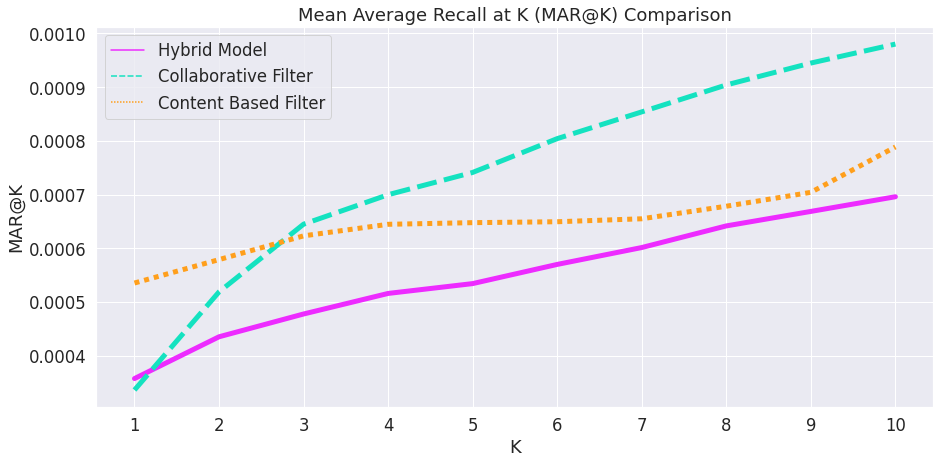

In [ ]:
mark_scores = [hb_mark, cf_mark, cb_mark]
index = range(1,10+1)
names = ['Hybrid Model', 'Collaborative Filter', 'Content Based Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mark_plot(mark_scores, model_names=names, k_range=index)

Precision

In [ ]:
# Fungsi ini menghitung presisi rata-rata pada k antara dua daftar item
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

In [ ]:
def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
cb_mapk = []
for K in np.arange(1, 11):
    cb_mapk.extend([mapk(actual, cb_predictions, k=K)])
cb_mapk

[0.05245901639344262,
 0.030737704918032786,
 0.024681238615664843,
 0.01922814207650273,
 0.015644808743169397,
 0.013082877959927137,
 0.011347719415635105,
 0.01036470530835285,
 0.009698803018475149,
 0.009286299765807964]

In [ ]:
cf_mapk = []
for K in np.arange(1, 11):
    cf_mapk.extend([mapk(actual, cf_predictions, k=K)])
cf_mapk

[0.036065573770491806,
 0.027868852459016394,
 0.022404371584699455,
 0.01956967213114754,
 0.01683606557377049,
 0.015031876138433516,
 0.013854689416750306,
 0.013070599141295861,
 0.012306430161621418,
 0.011797098620869112]

In [ ]:
hb_mapk = []
for K in np.arange(1, 11):
    hb_mapk.extend([mapk(actual, hb_predictions, k=K)])
hb_mapk

[0.05081967213114754,
 0.03360655737704918,
 0.024590163934426222,
 0.01915983606557377,
 0.015918032786885247,
 0.01413023679417122,
 0.012780751644920261,
 0.011669838017174082,
 0.010494622256917338,
 0.009658274785323967]

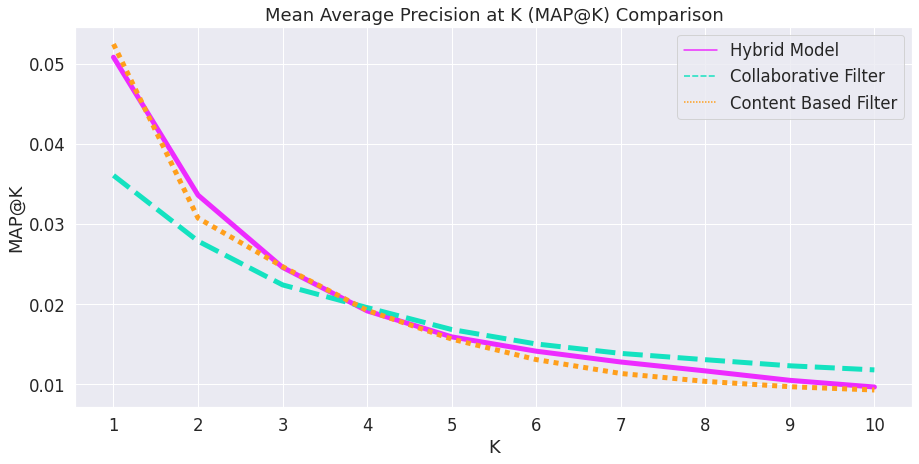

In [ ]:
mapk_scores = [hb_mapk, cf_mapk, cb_mapk]
index = range(1,10+1)
names = ['Hybrid Model', 'Collaborative Filter', 'Content Based Filter']

fig = plt.figure(figsize=(15, 7))
recmetrics.mapk_plot(mapk_scores, model_names=names, k_range=index)